<a href="https://colab.research.google.com/github/lpoggetto/aulas_machine_learning_FIAP/blob/main/aula4_20240926.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

ATIVIDADE 4: Classificador

1. Utilize a mesma base da atividade de KNN
Procure realizar a previsão (inferência) de uma variável categórica através de uma Árvore de Decisão e de uma Rede Neural.
2. Se certifique de medir seus níveis de assertividade. Compare o resultado com sua atividade do kNN. Não esqueça de realizar a interpretação das regras de negócio da árvore.


In [87]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

import tensorflow as tf
from tensorflow import keras

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder
#

### Metadados


    1. application_id: Unique identifier for each application
    2. gender: Applicant's gender (Male, Female)
    3. international: International student (TRUE/FALSE)
    4. gpa: Grade Point Average of the applicant (on 4.0 scale)
    5. major: Undergraduate major (Business, STEM, Humanities)
    6. race: Racial background of the applicant (e.g., White, Black, Asian, Hispanic, Other / null: international student)
    7. gmat: GMAT score of the applicant (800 points)
    8. work_exp: Number of years of work experience (Year)
    9. work_industry: Industry of the applicant's previous work experience (e.g., Consulting, Finance, Technology, etc.)
    10. admission: Admission status (Admit, Waitlist, Null: Deny)


In [57]:
#importando os dados
df = pd.read_csv('https://raw.githubusercontent.com/lpoggetto/aulas_machine_learning_FIAP/refs/heads/main/aula4/MBA.csv')

In [58]:
df.head()

,application_id,gender,international,gpa,major,race,gmat,work_exp,work_industry,admission
0,1,Female,False,3.30,Business,Asian,620.0,3.0,Financial Services,Admit
1,2,Male,False,3.28,Humanities,Black,680.0,5.0,Investment Management,NaN
2,3,Female,True,3.30,Business,NaN,710.0,5.0,Technology,Admit
3,4,Male,False,3.47,STEM,Black,690.0,6.0,Technology,NaN
4,5,Male,False,3.35,STEM,Hispanic,590.0,5.0,Consulting,NaN


### Descritivas

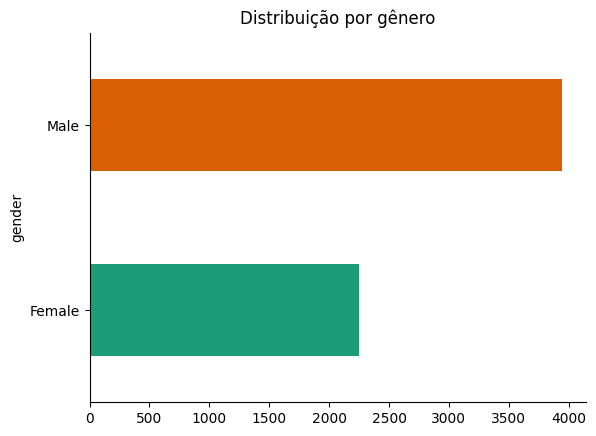

In [109]:
df.groupby('gender').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)
plt.title('Distribuição por gênero')
plt.show()

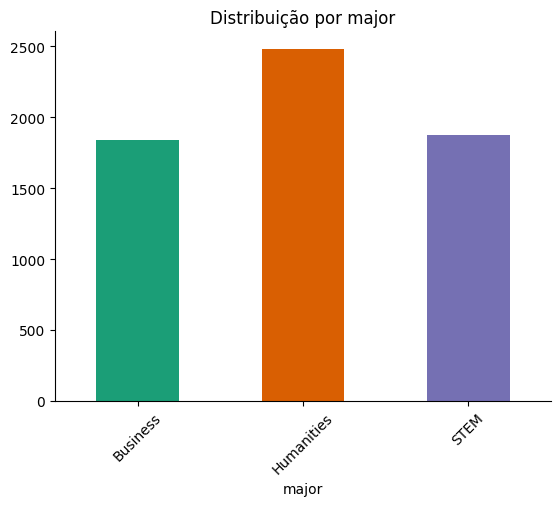

In [114]:
df.groupby('major').size().plot(kind='bar', color=sns.palettes.mpl_palette('Dark2')).set_xticklabels(df.groupby('major').size().index, rotation=45)
plt.gca().spines[['top', 'right',]].set_visible(False)
plt.title('Distribuição por major')
plt.show()

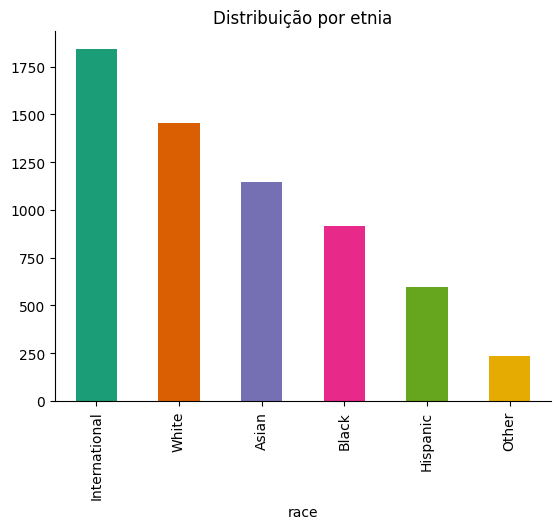

In [119]:
df.groupby('race').size().sort_values(ascending = False).plot(kind='bar', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)
plt.title('Distribuição por etnia')
plt.show()

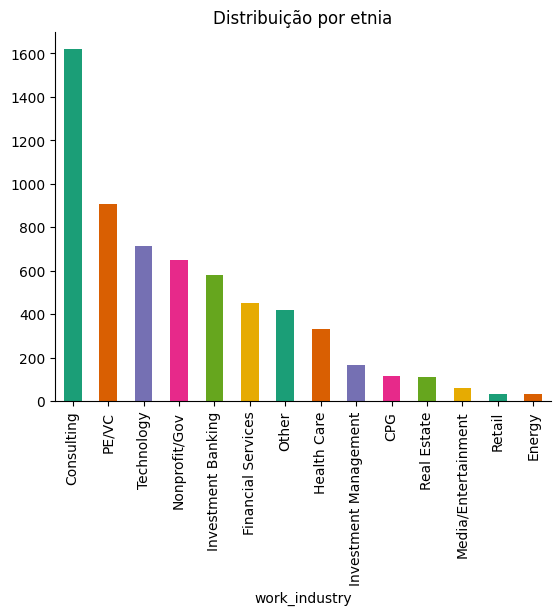

In [120]:
df.groupby('work_industry').size().sort_values(ascending = False).plot(kind='bar', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)
plt.title('Distribuição por etnia')
plt.show()

In [ ]:
df_num = df.drop('Outcome', axis=1)

# plotting a histogram for each numeric variable
df_analise_2.hist(figsize=(16, 20), xlabelsize=8, ylabelsize=8);

In [59]:
#validando valores nulos

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6194 entries, 0 to 6193
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   application_id  6194 non-null   int64  
 1   gender          6194 non-null   object 
 2   international   6194 non-null   bool   
 3   gpa             6194 non-null   float64
 4   major           6194 non-null   object 
 5   race            4352 non-null   object 
 6   gmat            6194 non-null   float64
 7   work_exp        6194 non-null   float64
 8   work_industry   6194 non-null   object 
 9   admission       1000 non-null   object 
dtypes: bool(1), float64(3), int64(1), object(5)
memory usage: 441.7+ KB


In [60]:
# identificados valores nulos na variavel race e admission
# aplicando tratativas para valores nulos de acordo com os metadados

df['race'] = df['race'].fillna('International')
df['admission'] = df['admission'].fillna('Deny')
df.drop('international', axis = 1, inplace=True)
df.drop('application_id', axis=1, inplace=True)


In [61]:
df.head()

,gender,gpa,major,race,gmat,work_exp,work_industry,admission
0,Female,3.30,Business,Asian,620.0,3.0,Financial Services,Admit
1,Male,3.28,Humanities,Black,680.0,5.0,Investment Management,Deny
2,Female,3.30,Business,International,710.0,5.0,Technology,Admit
3,Male,3.47,STEM,Black,690.0,6.0,Technology,Deny
4,Male,3.35,STEM,Hispanic,590.0,5.0,Consulting,Deny


In [62]:
# Feature engineering
# Transformando as variaveis categoricas com one hot encoding

df_dum = pd.get_dummies(df, columns=['gender', 'major', 'race', 'work_industry'], drop_first=True)

# transformando todas as variaveis booleanas em int

In [63]:
df_dum.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6194 entries, 0 to 6193
Data columns (total 25 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   gpa                                  6194 non-null   float64
 1   gmat                                 6194 non-null   float64
 2   work_exp                             6194 non-null   float64
 3   admission                            6194 non-null   object 
 4   gender_Male                          6194 non-null   bool   
 5   major_Humanities                     6194 non-null   bool   
 6   major_STEM                           6194 non-null   bool   
 7   race_Black                           6194 non-null   bool   
 8   race_Hispanic                        6194 non-null   bool   
 9   race_International                   6194 non-null   bool   
 10  race_Other                           6194 non-null   bool   
 11  race_White                    

In [73]:
# Convertendo as variaveis booleanas para int

bool_cols = df_dum.select_dtypes(include='bool').columns
df_dum[bool_cols] = df_dum[bool_cols].astype(int)

# convertendo target para int
# Convert 'admission' column to numerical values (0 and 1)
df_dum['admission'] = pd.factorize(df_dum['admission'])[0]

In [75]:
df_dum.head()

,gpa,gmat,work_exp,admission,gender_Male,major_Humanities,major_STEM,race_Black,race_Hispanic,race_International,...,work_industry_Health Care,work_industry_Investment Banking,work_industry_Investment Management,work_industry_Media/Entertainment,work_industry_Nonprofit/Gov,work_industry_Other,work_industry_PE/VC,work_industry_Real Estate,work_industry_Retail,work_industry_Technology
0,3.30,620.0,3.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3.28,680.0,5.0,1,1,1,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
2,3.30,710.0,5.0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
3,3.47,690.0,6.0,1,1,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,1
4,3.35,590.0,5.0,1,1,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [76]:
# dropando application_id e separando os dados em X_train, x_test
X_train, X_test, y_train, y_test = train_test_split(df_dum.drop('admission', axis=1), df_dum['admission'], test_size=0.2, random_state=42)

### Arvore de decisao

In [99]:
# criando a arvore
tree = DecisionTreeClassifier(random_state=42, max_depth = 10, max_leaf_nodes = 10)
tree.fit(X_train, y_train)

# prevendo os dados de teste
prev_teste = tree.predict(X_test)

# avaliando o modelo
print(classification_report(y_test, prev_teste))

              precision    recall  f1-score   support

           0       0.47      0.13      0.21       196
           1       0.84      0.97      0.90      1025
           2       0.00      0.00      0.00        18

    accuracy                           0.83      1239
   macro avg       0.44      0.37      0.37      1239
weighted avg       0.77      0.83      0.78      1239

[[ 26 170   0]
 [ 28 997   0]
 [  1  17   0]]


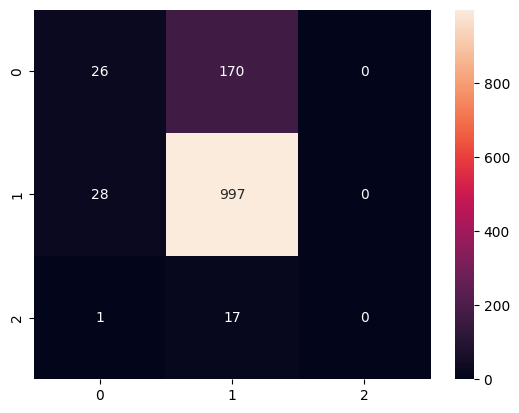

In [101]:
#heatmap com confusion matrix
sns.heatmap(confusion_matrix(y_test, prev_teste), annot=True, fmt='d')
plt.show()

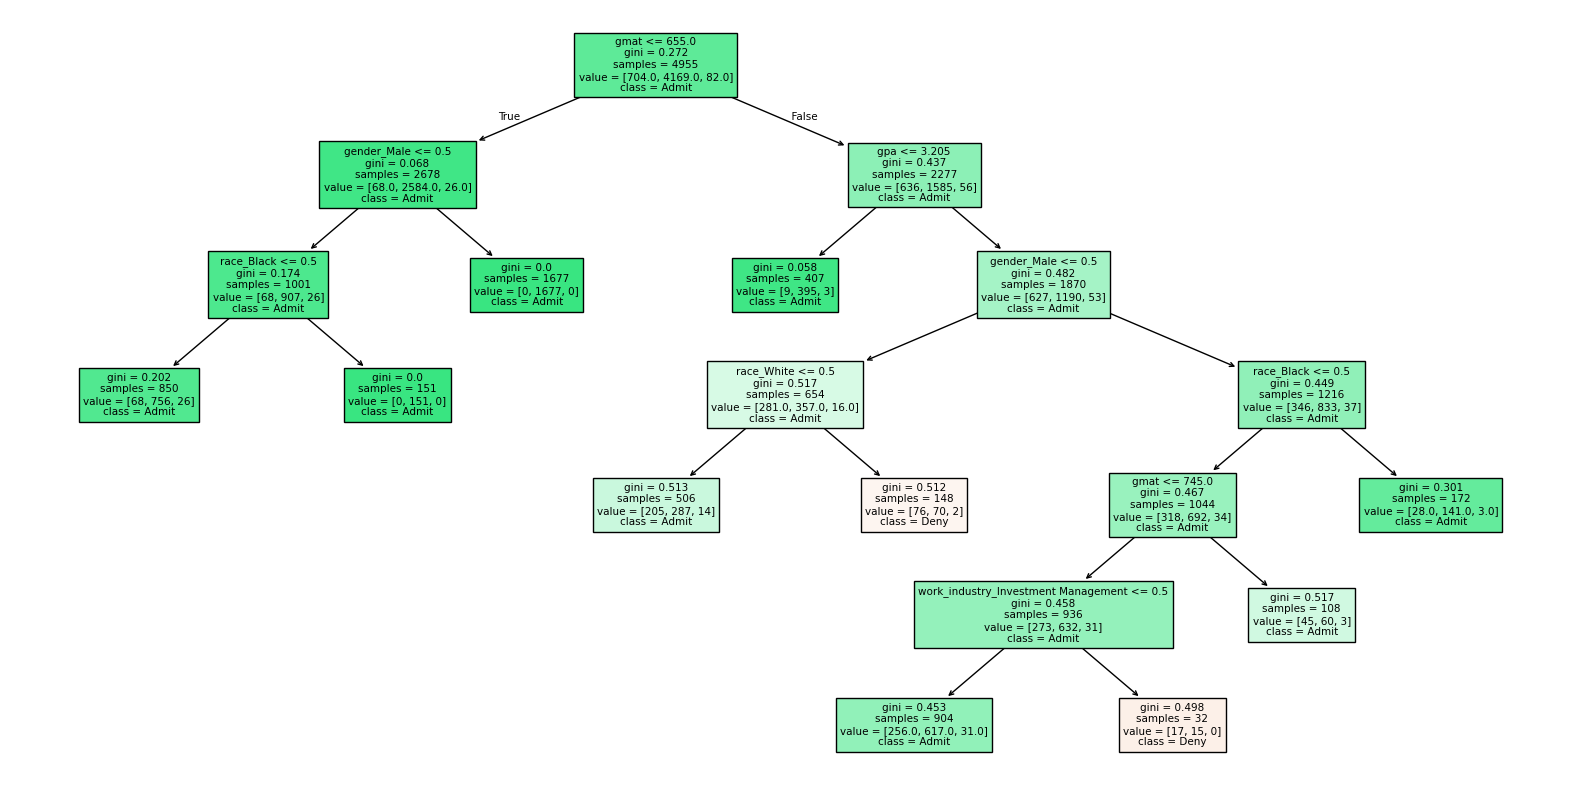

In [100]:
# plotando a arvore
plt.figure(figsize=(20, 10))
plot_tree(tree, filled=True, feature_names=X_train.columns, class_names=['Deny', 'Admit', 'Waitlist'])
plt.show()

### Neural Network

In [102]:

# 4 | 3 | 2 | 1
nn = keras.Sequential([
  keras.layers.Input((X_train.shape[1],)),
  keras.layers.Dense(3,activation='relu'),
  keras.layers.Dense(2,activation='relu'),
  keras.layers.Dense(1,activation='sigmoid'),
])
nn.compile(optimizer='adam',loss='binary_crossentropy', metrics = ['accuracy'])
nn.fit(X_train , y_train)

prev_teste = nn.predict(X_test)
prev_teste

155/155 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8478 - loss: 2.1892
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


array([[0.97751045],
       [0.973777  ],
       [0.98155487],
       ...,
       [0.97553205],
       [0.9796027 ],
       [0.98264486]], dtype=float32)

In [103]:
prev_teste = (prev_teste > 0.5).astype(int)
prev_teste

array([[1],
       [1],
       [1],
       ...,
       [1],
       [1],
       [1]])